<a href="https://colab.research.google.com/github/Jkia65/Assignment-3-Python-Refresher/blob/main/Assignment_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 13: Generative AI Essentials

Step 1: Data Preparation

In [6]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import requests


# Load Dataset (Project Gutenberg)
# Using Alice’s Adventures in Wonderland as sample text
url = "https://www.gutenberg.org/files/11/11-0.txt"
text = requests.get(url).text.lower()  # convert to lowercase

# Inspect Text
print("Text length:", len(text))
print("Sample text:", text[:500])


Text length: 144696
Sample text: *** start of the project gutenberg ebook 11 ***

[illustration]




alice’s adventures in wonderland

by lewis carroll

the millennium fulcrum edition 3.0

contents

 chapter i.     down the rabbit-hole
 chapter ii.    the pool of tears
 chapter iii.   a caucus-race and a long tale
 chapter iv.    the rabbit sends in a little bill
 chapter v.     advice from a caterpillar
 chapter vi.    pig and pepper
 chapter vii.   a mad tea-party
 chapter viii.  the queen’s croquet-ground
 chapter ix.    the


# Step 2: Exploring Generative Pre-trained Transformers (GPTs)

Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 26s 110ms/step - accuracy: 0.0565 - loss: 6.7487
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 106ms/step - accuracy: 0.0593 - loss: 6.0554
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 22s 110ms/step - accuracy: 0.0604 - loss: 5.8705
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.0705 - loss: 5.7377
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 104ms/step - accuracy: 0.0750 - loss: 5.6203
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 22s 111ms/step - accuracy: 0.0852 - loss: 5.5385
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 40s 105ms/step - accuracy: 0.0916 - loss: 5.4378
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 42s 112ms/step - accuracy: 0.0978 - loss: 5.3994
Epoch 9/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 21s 105ms/step - accuracy: 0.1020 - loss: 5.3299
Epoch 10/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 43s 113ms/step - accuracy: 0.1073 - loss: 5.2571


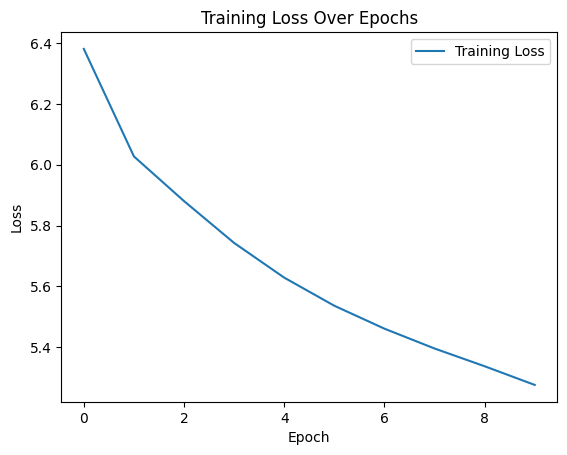

Alice was ” said the king and the little little little little little little little little little little little little the alice


In [9]:
# GPT Architecture Description

# Transformer-based: Uses self-attention for context-aware text generation
# Tokenization: Input text is broken into tokens/subwords
# Probabilities: Next token predicted based on context
# Sequence Generation: Iteratively generates text using predicted tokens


# Training a Basic Text Generation Model

# Tokenization and sequence preparation
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_seq = token_list[:i+1]
        input_sequences.append(n_gram_seq)

max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre'))

X = input_sequences[:, :-1]
y = input_sequences[:, -1]
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

# LSTM model (simple text generator)
model = Sequential([
    Embedding(total_words, 64, input_length=X.shape[1]),
    LSTM(100, return_sequences=True),
    LSTM(100),
    Dense(total_words, activation='softmax')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X, y, epochs=10, batch_size=128)

# Plot Training Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Text generation
def generate_text(seed_text, next_words=20):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=X.shape[1], padding='pre')
        predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]
        output_word = tokenizer.index_word.get(predicted, '')
        seed_text += ' ' + output_word
    return seed_text

print(generate_text("Alice was", next_words=20))

Step 3: Application Demonstration

In [8]:
# Practical Example: Content Creation for Story Continuation

# Seed text for content generation
seed_texts = [
    "Alice was",
    "The rabbit suddenly",
    "Queen of hearts said"
]

# Generate 30 words for each seed
for seed in seed_texts:
    generated = generate_text(seed, next_words=30)
    print(f"Seed: '{seed}'")
    print(f"Generated Text: {generated}\n")

Seed: 'Alice was'
Generated Text: Alice was ” said the king and the little little little little little little little little little little little little little little little little little little little little little little little little

Seed: 'The rabbit suddenly'
Generated Text: The rabbit suddenly ” said the king and the little little little little little little little little little little little little little little little little little little little little little little little little

Seed: 'Queen of hearts said'
Generated Text: Queen of hearts said to the little little little little little little little little little little little little little little little little little little little little little little little little little little little little

